# Convolutional Neural Networks

In [52]:
#Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [4]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow import keras

# Cargar set de Imágenes

In [12]:
dirname = os.path.join(os.getcwd(), 'toses-images')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(png|bm)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                print(root, cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\dev\tfg\src\poc\toses-images\
C:\dev\tfg\src\poc\toses-images\DETECTABLE 1
C:\dev\tfg\src\poc\toses-images\NO-DETECTABLE 2898
Directorios leidos: 2
Imagenes en cada directorio [2899, 2897]
suma Total de imagenes en subdirs: 5796


# Creamos las etiquetas

In [13]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  5796


In [14]:
deportes=[] #TODO cambiar nombre de deportes por muestras.
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 DETECTABLE
1 NO-DETECTABLE


In [15]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


# Creamos Sets de Entrenamiento y Test

In [16]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (4636, 54, 55, 4) (4636,)
Testing data shape :  (1160, 54, 55, 4) (1160,)


Text(0.5, 1.0, 'Ground Truth : 1')

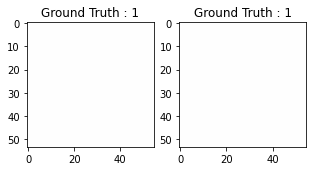

In [20]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [22]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [23]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [24]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [27]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(3708, 54, 55, 4) (928, 54, 55, 4) (3708, 2) (928, 2)


# Creamos el modelo de CNN

In [28]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [44]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(54,55,4))) #Height Width and 1 if black and white or 3 if RGB (color). Original values 21,28,3
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [45]:
sport_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 55, 32)        1184      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 54, 55, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 28, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 27, 28, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 24192)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                774176    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32)               

In [46]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [47]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
58/58 [==============================] - 7s 100ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 2/10
58/58 [==============================] - 5s 92ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 3/10
58/58 [==============================] - 5s 92ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 4/10
58/58 [==============================] - 5s 94ms/step - loss: 0.6932 - accuracy: 0.5119 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 5/10
58/58 [==============================] - 5s 93ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 6/10
58/58 [==============================] - 6s 108ms/step - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6931 - val_accuracy: 0.5162
Epoch 7/10
58/58 [==============================] - 6s 100ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.5162
Epoch 8/10

In [48]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("toses_mnist.h5py")

INFO:tensorflow:Assets written to: toses_mnist.h5py\assets


# Evaluamos la red

In [49]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

37/37 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.4759


In [50]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6933580636978149
Test accuracy: 0.475862056016922


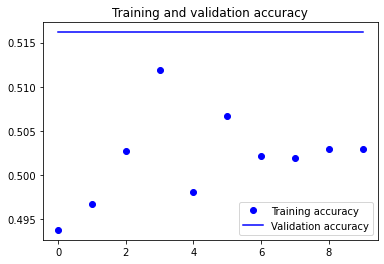

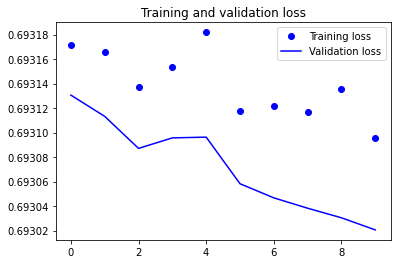

In [51]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
predicted_classes2 = sport_model.predict(test_X)

In [53]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [54]:
predicted_classes.shape, test_Y.shape

((1160,), (1160,))

# Aprendamos de los errores: Qué mejorar

Found 552 correct labels


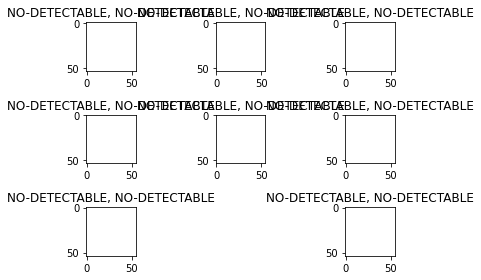

In [56]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(54,55,4), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 608 incorrect labels


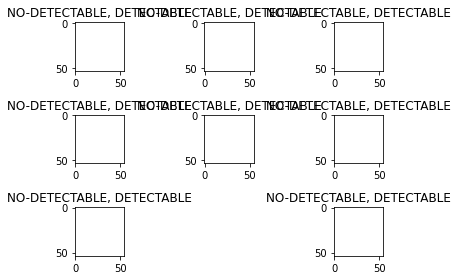

In [57]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(54,55,4), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [58]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       608
     Class 1       0.48      1.00      0.64       552

    accuracy                           0.48      1160
   macro avg       0.24      0.50      0.32      1160
weighted avg       0.23      0.48      0.31      1160



C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\epasc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediccion de una nueva imagen

In [59]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['audio-prueba-novia-juan/WhatsApp Audio 2022-06-07 at 10.33.36 AM.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (54, 55),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

audio-prueba-novia-juan/WhatsApp Audio 2022-06-07 at 10.33.36 AM.png NO-DETECTABLE
